In [1]:
import matplotlib.pyplot as plt
import torch
from tokenizers import Tokenizer

from model.lstm_with_attention import LSTMWithAttentionClassifier

In [2]:
COARSE_LABELS = [
    "ABBR (0): Abbreviation",
    "ENTY (1): Entity",
    "DESC (2): Description and abstract concept",
    "HUM (3): Human being",
    "LOC (4): Location",
    "NUM (5): Numeric value",
]

FINE_LABELS = [
    "ABBR (0): Abbreviation",
    "ABBR (1): Expression abbreviated",
    "ENTY (2): Animal",
    "ENTY (3): Organ of body",
    "ENTY (4): Color",
    "ENTY (5): Invention, book and other creative piece",
    "ENTY (6): Currency name",
    "ENTY (7): Disease and medicine",
    "ENTY (8): Event",
    "ENTY (9): Food",
    "ENTY (10): Musical instrument",
    "ENTY (11): Language",
    "ENTY (12): Letter like a-z",
    "ENTY (13): Other entity",
    "ENTY (14): Plant",
    "ENTY (15): Product",
    "ENTY (16): Religion",
    "ENTY (17): Sport",
    "ENTY (18): Element and substance",
    "ENTY (19): Symbols and sign",
    "ENTY (20): Techniques and method",
    "ENTY (21): Equivalent term",
    "ENTY (22): Vehicle",
    "ENTY (23): Word with a special property",
    "DESC (24): Definition of something",
    "DESC (25): Description of something",
    "DESC (26): Manner of an action",
    "DESC (27): Reason",
    "HUM (28): Group or organization of persons",
    "HUM (29): Individual",
    "HUM (30): Title of a person",
    "HUM (31): Description of a person",
    "LOC (32): City",
    "LOC (33): Country",
    "LOC (34): Mountain",
    "LOC (35): Other location",
    "LOC (36): State",
    "NUM (37): Postcode or other code",
    "NUM (38): Number of something",
    "NUM (39): Date",
    "NUM (40): Distance, linear measure",
    "NUM (41): Price",
    "NUM (42): Order, rank",
    "NUM (43): Other number",
    "NUM (44): Lasting time of something",
    "NUM (45): Percent, fraction",
    "NUM (46): Speed",
    "NUM (47): Temperature",
    "NUM (48): Size, area and volume",
    "NUM (49): Weight",
]

In [3]:
TOKENIZER_PATH = "./data/trec/tokenizer.json"
MODEL_PATH = "../lightning_logs/version_15/checkpoints/epoch=9-step=1710.ckpt"

In [4]:
tokenizer = Tokenizer.from_file(TOKENIZER_PATH)
model = LSTMWithAttentionClassifier.load_from_checkpoint(MODEL_PATH)
model.eval()

LSTMWithAttentionClassifier(
  (embedding): Embedding(15194, 256, padding_idx=3)
  (lstm): LSTM(256, 128, num_layers=2, batch_first=True, dropout=0.01, bidirectional=True)
  (attention): Attention(
    (WQuery): Linear(in_features=256, out_features=256, bias=True)
    (WKey): Linear(in_features=256, out_features=256, bias=True)
    (WValue): Linear(in_features=256, out_features=1, bias=True)
  )
  (fc): Linear(in_features=256, out_features=50, bias=True)
  (criteria): CrossEntropyLoss()
  (accuracy): MulticlassAccuracy()
)

In [5]:
text = "Historical events that led to the Industrial Revolution?"
encoding = tokenizer.encode(text)
ids = torch.tensor([encoding.ids])
logits, attention_weights = model(ids)
label = logits.argmax(dim=1).item()

In [6]:
encoding.tokens

['Historical',
 'events',
 'that',
 'led',
 'to',
 'the',
 'Industrial',
 'Revolution',
 '?']

In [7]:
label, FINE_LABELS[label] if model.fine else COARSE_LABELS[label]

(5, 'ENTY (5): Invention, book and other creative piece')

In [8]:
attention_weights = attention_weights.squeeze().detach().numpy()
attention_weights

array([8.5789308e-02, 9.1383183e-01, 3.6279188e-04, 1.6167265e-05,
       2.8391932e-08, 2.0666244e-14, 4.3595913e-18, 8.7042736e-20,
       2.8987194e-21], dtype=float32)

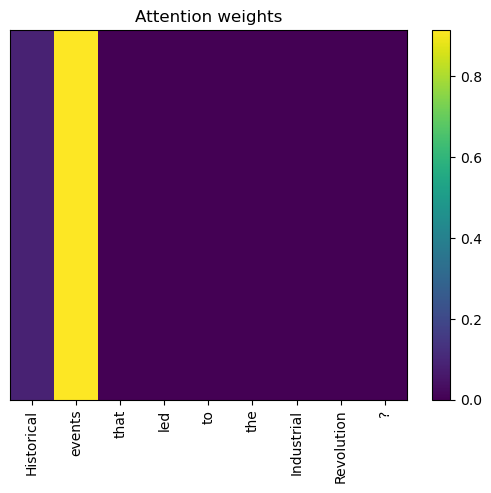

In [9]:
fig, ax = plt.subplots()
im = ax.imshow(attention_weights.reshape(1, -1), aspect="auto")
ax.set_xticks(range(len(encoding.tokens)))
ax.set_xticklabels(encoding.tokens, rotation=90)
ax.set_yticks([])
ax.set_title("Attention weights")
fig.colorbar(im, ax=ax)